## Lembar Jawaban Tugas Mandiri Pertemuan 15

Nama  : Erika Lety Istikhomah Puspita Sari

Kelas : TelU-005

# Tugas Mandiri Pertemuan 15
---
Pertemuan 15 (limabelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model (Clustering). silakan Anda kerjakan Latihan 1 s/d 10. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">


Dalam Kasus ini, kita akan melakukan pengelompokan data tanpa pengawasan /unsupervised clustering pada catatan pelanggan dari database perusahaan bahan makanan. Segmentasi pelanggan/Customer segmentation adalah praktik memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster. Kita akan membagi pelanggan menjadi beberapa segmen untuk mengoptimalkan signifikansi setiap pelanggan bagi bisnis. Untuk memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. Ini juga membantu bisnis untuk memenuhi kekhawatiran berbagai jenis pelanggan.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)
    
[3. DATA CLEANING](#3)
    
[4. DATA PREPROCESSING](#4)   
    
[5. DIMENSIONALITY REDUCTION](#5) 
      
[6. CLUSTERING](#6)
    
[7. EVALUATING MODELS](#7)
    
[8. PROFILING](#8)
    
[9. CONCLUSION](#9)
    
[10. END](#10)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

# Latihan (1)

In [24]:
# Import library numpy untuk operasi fungsi aritmatika
import numpy as np
# import library pandas untuk operasi dataframe
import pandas as pd

# Import library matplotlib dan seaborn untuk visualisasi
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

# Import library Axes3D untuk vizualisasi 3 Dimensi 
import seaborn as sns

# import library datetime untuk operasi yang berhubungan dengan waktu.
import datetime

# import library Label encoder untuk mengubah setiap nilai dalam kolom menjadi angka yang berurutan / numeric
from sklearn.preprocessing import LabelEncoder
# import library StandardScaler untuk menskalakan nilai kolom jika terdpaat perbedaan skala, StandardScaler berfungsi menghilangkan mean (terpusat pada 0) dan menskalakan ke variansi (deviasi standar = 1), dengan asumsi data terdistribusi normal (gauss) untuk semua fitur
from sklearn.preprocessing import StandardScaler

# import library PCA adalah prosedur statistik yang mengekstrak fitur-fitur terpenting dari suatu dataset
from sklearn.decomposition import PCA

# import library KElbowVisualizer untuk mengimplementasikan metode "elbow/siku" untuk data scientist memilih jumlah cluster yang optimal dengan menyesuaikan model dengan rentang nilai untuk K
from yellowbrick.cluster import KElbowVisualizer

# import library KMeans metode adalah teknik unsupervised machine learning yang digunakan untuk mengidentifikasi kelompok objek data dalam kumpulan data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics


# import library AgglomerativeClustering untuk melakukan pengelompokan data menggunakan bottom-up manner
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap


# import library metrics untuk mengimplementasikan fungsi yang menilai kesalahan prediksi untuk tujuan tertentu
from sklearn import metrics
import warnings
import sys

# me-non aktifkan peringatan pada python
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# mendefinisikan nilai acak 
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

# Latihan (2)

In [25]:
#Load the dataset dan tampilkan data nya 
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

Untuk informasi lebih lanjut tentang atribut data [disini](https://www.kaggle.com/imakash3011/customer-personality-analysis).

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>


**Di bagian ini** 
* Data Cleaning
* Feature Engineering 

Untuk mendapatkan pemahaman penuh tentang langkah-langkah apa yang harus kita ambil untuk membersihkan dataset.
Mari kita lihat informasi dalam data.


# Latihan (3)

In [26]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Dari output di atas, kita dapat menyimpulkan dan mencatat bahwa:**

* Ada nilai yang hilang/missing value dalam kolom income
* Dt_Customer yang menunjukkan tanggal pelanggan bergabung dengan database tidak diuraikan sebagai DateTime
* Ada beberapa fitur kategoris dalam dataframe; karena ada beberapa fitur bertipe object. Jadi kita perlu mengkodekannya ke dalam bentuk numerik nanti.

Pertama-tama, untuk nilai yang hilang, kita hanya akan menghapus baris yang memiliki nilai pendapatan yang hilang.

In [27]:
# menghapus missing values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


Pada langkah selanjutnya, kita akan membuat fitur dari **"Dt_Customer"** yang menunjukkan jumlah hari pelanggan terdaftar di database perusahaan. Namun, untuk membuatnya tetap sederhana, kita mengambil nilai ini relatif terhadap pelanggan terbaru dalam catatan.

Jadi untuk mendapatkan nilai, kita harus memeriksa tanggal rekaman terbaru dan terlama.

In [28]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
    
# Tanggal pelanggan terbaru dan terlama yang tercatat
print("Tanggal pelanggan terbaru yang tercatat:",max(dates))
print("Tanggal pelanggan terlama yang tercatat:",min(dates))


Tanggal pelanggan terbaru yang tercatat: 2014-12-06
Tanggal pelanggan terlama yang tercatat: 2012-01-08


Membuat fitur **("Customer_For")** dari jumlah hari pelanggan mulai berbelanja di toko relatif terhadap tanggal terakhir yang tercatat

In [29]:
# Membuat fitur "Customer_For"
days = []
d1 = max(dates) # membawanya menjadi pelanggan terbaru
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Sekarang kita akan mengeksplorasi nilai unik dalam fitur kategoris untuk mendapatkan gambaran yang jelas tentang data.

In [30]:
print("Total kategori dalam fitur Marital_Status:\n\n", data["Marital_Status"].value_counts(), "\n")
print("Total kategori dalam fitur Education:\n\n", data["Education"].value_counts())

Total kategori dalam fitur Marital_Status:

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Total kategori dalam fitur Education:

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Latihan (4)

**Pada step berikutnya, kita akan melakukan langkah-langkah berikut untuk merekayasa beberapa fitur baru:**

* Ekstrak **"Age"** dari pelanggan dengan **"Year_Birth"** yang menunjukkan tahun lahir orang yang bersangkutan.

* Buat fitur lain **"Spent"** yang menunjukkan jumlah total yang dibelanjakan oleh pelanggan dalam berbagai kategori selama rentang waktu dua tahun.

* Buat fitur lain **"Living_With"** dari **"Marital_Status"** untuk mengekstrak situasi kehidupan pasangan.

* Buat fitur **"Children"** untuk menunjukkan jumlah anak dalam rumah tangga, anak-anak dan remaja.

* Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, Membuat fitur yang menunjukkan **"Family_Size"**

* Buat fitur **"Is_Parent"** untuk menunjukkan status orang tua

* Terakhir, kita akan membuat tiga kategori di **"Education"** dengan menyederhanakan penghitungan nilainya.

* Menjatuhkan beberapa fitur yang berlebihan / redundant features

In [31]:
#Feature Engineering

# Usia pelanggan hari ini 
data["Age"] = 2021-data["Year_Birth"]

# Total pengeluaran untuk berbagai macam item
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# situasi kehidupan dari status pernikahan "Alone" 
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Fitur yang menunjukkan jumlah anak yang tinggal di rumah tangga
data["Children"]=data["Kidhome"]+data["Teenhome"]

# Fitur untuk total anggota dalam rumah tangga
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# Fitur yang berkaitan dengan orang tua
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

# Segmentasi tingkat pendidikan dalam tiga kelompok
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Untuk kejelasan produk
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Drop / Menjatuhkan beberapa fitur yang berlebihan / redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Sekarang kita memiliki beberapa fitur baru, mari kita lihat statistik data.

In [32]:
# melihat statistik data untuk data numeric
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


# Latihan (5)

Statistik di atas menunjukkan beberapa perbedaan dalam rata - rata Pendapatan dan income, dan maksimal pendapatan Usia/Age.

Perhatikan bahwa usia maksimal adalah 128 tahun, Karena kita menghitung usia yang akan menjadi hari ini (yaitu 2021) dan datanya sudah tua.

Kita harus melihat pada pandangan yang lebih luas dari data. 

Kita akan memplot beberapa fitur yang dipilih.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

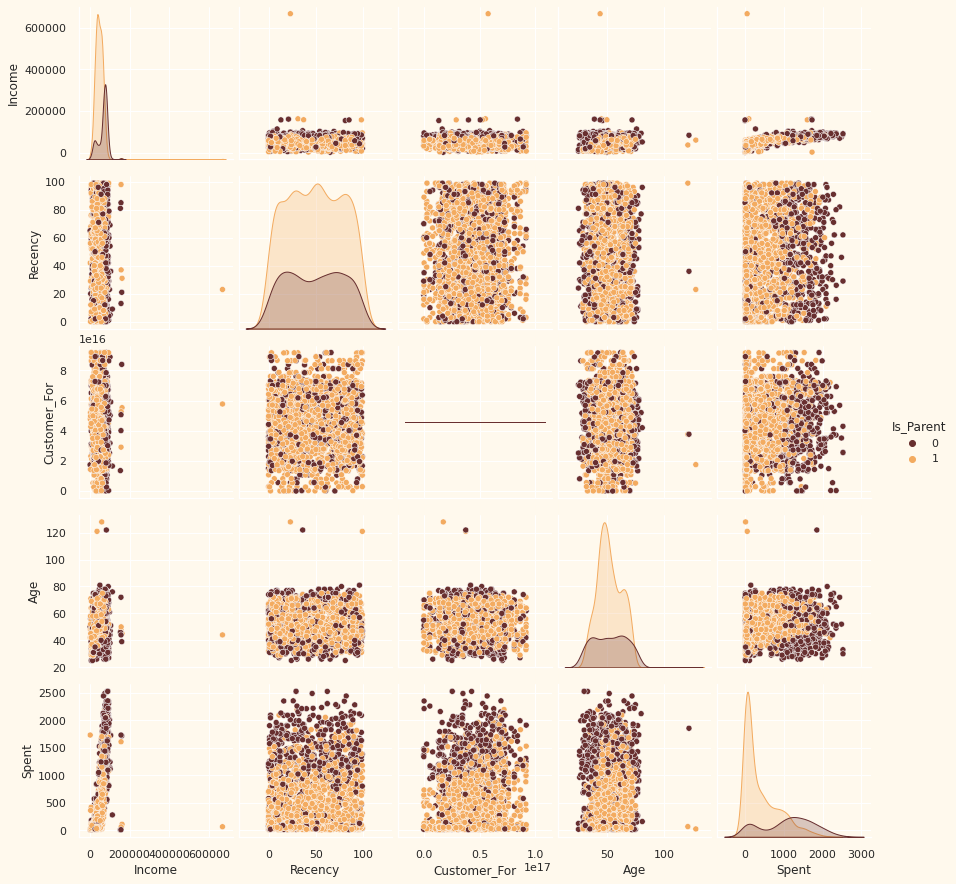

In [33]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


#Plotting fitur
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

Jelas, ada beberapa outlier dalam fitur Pendapatan dan Usia.

Kita akan menghapus outlier dalam data.

In [34]:
# Drop outlier dengan menetapkan batas pada Usia dan pendapatan.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Jumlah total data setelah menghapus outlier adalah:", len(data))

Jumlah total data setelah menghapus outlier adalah: 2212


Selanjutnya, mari kita lihat korelasi di antara fitur-fiturnya. 

(Tidak termasuk atribut kategoris pada saat ini)

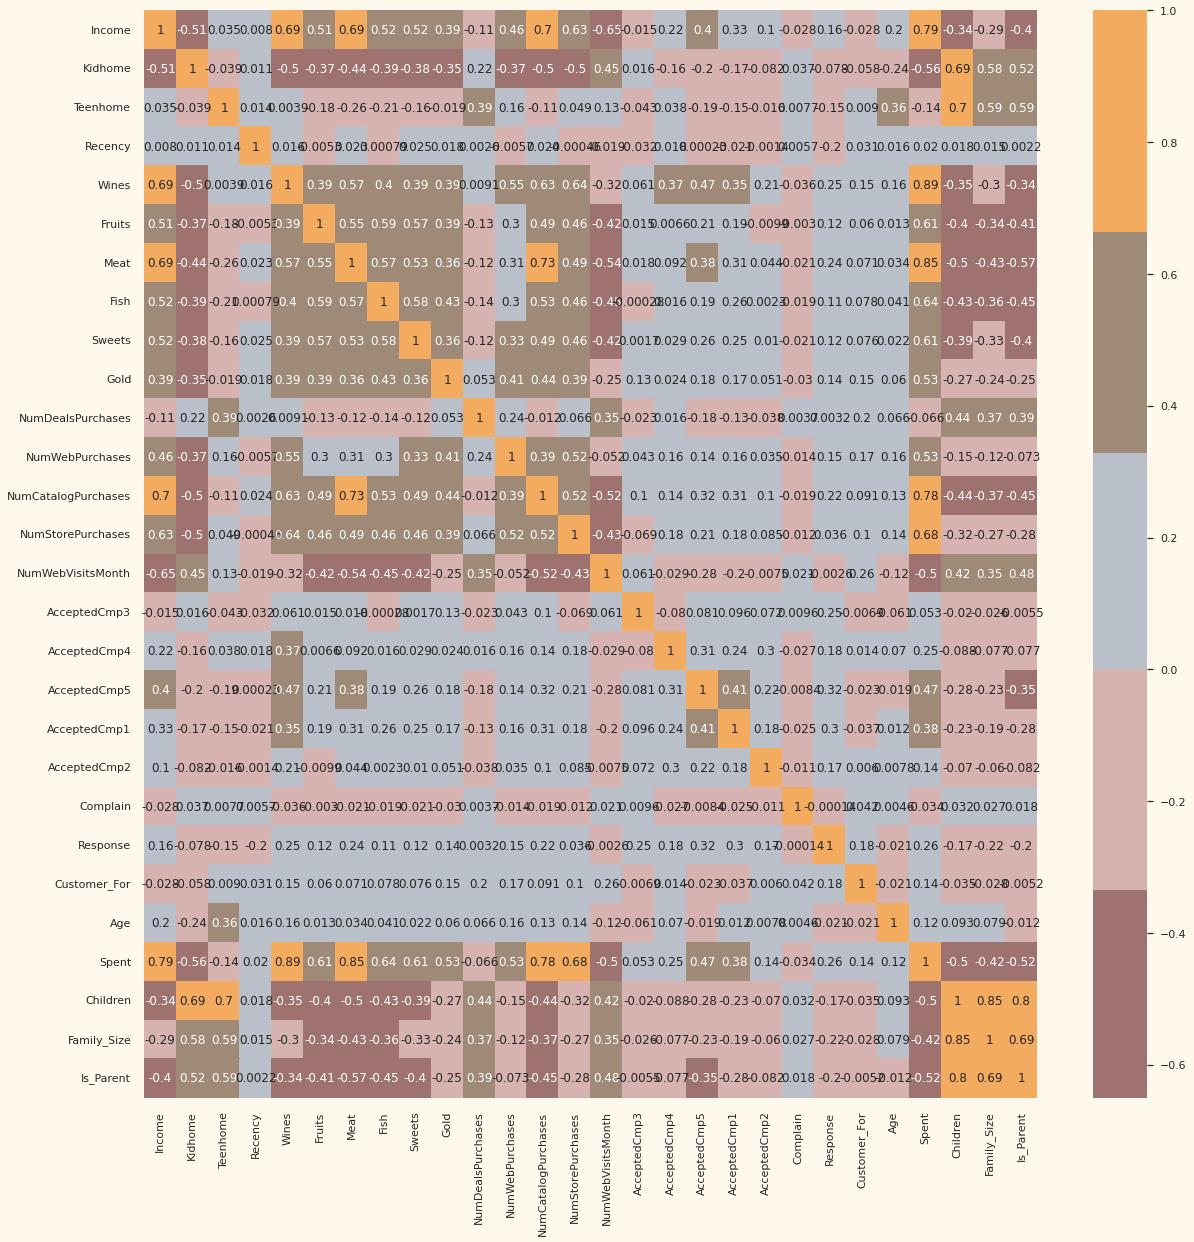

In [35]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Datanya cukup bersih dan fitur-fitur baru telah disertakan. Kita akan melanjutkan ke langkah berikutnya. Yaitu mengolah data terlebih dahulu.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

Pada bagian ini, kita akan melakukan preprocessing data untuk melakukan operasi clustering.

**Langkah-langkah berikut diterapkan untuk memproses data sebelumnya:**

* Label encoding/Label pengkodean fitur kategoris
* Menskalakan fitur menggunakan scaler standar
* Membuat subset dataframe untuk pengurangan dimensi / dimensionality reduction

# Latihan (6)

In [36]:
# Get List dari variabel categorical
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategori dalam dataset:", object_cols)

Variabel kategori dalam dataset: ['Education', 'Living_With']


In [37]:
# Label Encoding (dtypes: objek)
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("Semua fitur sekarang numerik")

Semua fitur sekarang numerik


In [38]:
# Membuat salinan data
ds = data.copy()

# membuat subset dataframe dengan menghapus fitur pada penawaran yang diterima (features on deals accepted) dan promosi (promotions)
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [39]:
# Data yang diskalakan untuk digunakan untuk mengurangi dimensi/reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>

Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur ini berkorelasi, dan karenanya berlebihan/redundant. Inilah sebabnya mengapa kita akan melakukan pengurangan dimensi pada fitur yang dipilih sebelum menempatkannya melalui pengklasifikasi.
*Pengurangan dimensi/Dimensionality reduction adalah proses mengurangi jumlah variabel acak yang dipertimbangkan, dengan memperoleh satu set variabel utama.*

**Principal component analysis (PCA)** adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan kemampuan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

**Langkah - langkah pada bagian ini:**
* Pengurangan dimensi dengan PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

Untuk kasus ini, kita akan mengurangi dimensi menjadi 3.

# Latihan (7)

In [40]:
# Memulai PCA untuk mengurangi dimensi alias fitur menjadi 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-8.612761e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,2.559737e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,4.449425e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


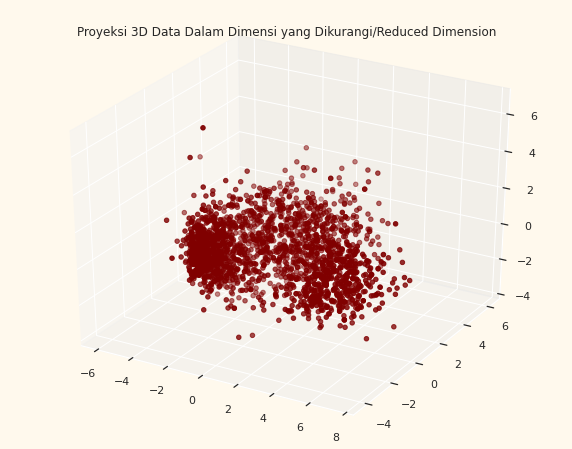

In [41]:
# Proyeksi 3D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Proyeksi 3D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Sekarang kita telah mengurangi atribut menjadi tiga dimensi, kita akan melakukan pengelompokan melalui pengelompokan Agglomerative. Pengelompokan aglomeratif adalah metode pengelompokan hierarkis. Ini melibatkan penggabungan contoh sampai jumlah cluster yang diinginkan tercapai.

**Langkah-langkah yang dilakukan dalam Clustering**
* Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
* Clustering melalui Agglomerative Clustering
* Memeriksa cluster yang terbentuk melalui scatter plot

# Latihan (8)

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


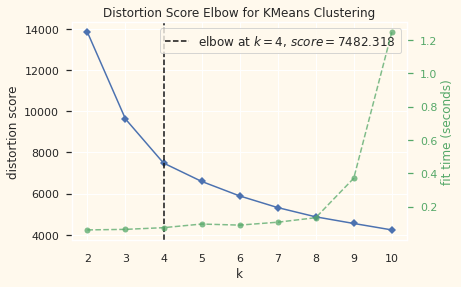

In [42]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Sel di atas menunjukkan bahwa empat akan menjadi jumlah cluster yang optimal untuk data ini. 

Selanjutnya, kita akan fit Model Agglomerative Clustering untuk mendapatkan cluster akhir.

In [43]:
# Memulai model Agglomerative Clustering 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Menambahkan fitur Cluster ke dataframe asli.
data["Clusters"]= yhat_AC

Untuk memeriksa cluster yang terbentuk mari kita lihat distribusi 3-D dari cluster.

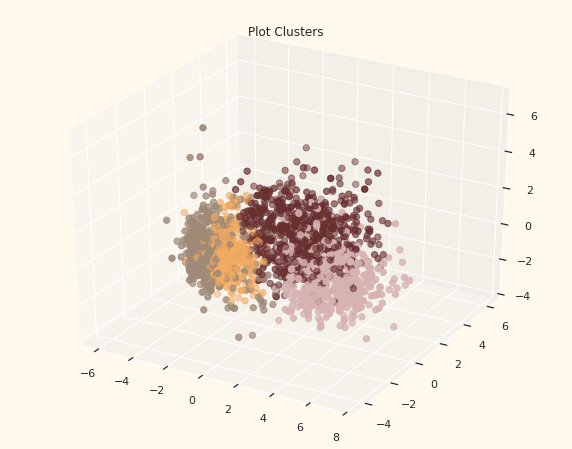

In [44]:
#Plotting clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Plot Clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Karena ini adalah unsupervised clustering. Kita tidak memiliki fitur yang ditandai untuk mengevaluasi atau menilai model kita. Tujuan dari bagian ini adalah untuk mempelajari pola-pola dalam klaster yang terbentuk dan menentukan sifat dari pola klaster tersebut.

Untuk itu, kita akan melihat data berdasarkan cluster melalui analisis data eksplorasi dan penarikan kesimpulan.

**Pertama, mari kita lihat distribusi grup dari clustering**

# Latihan (9)

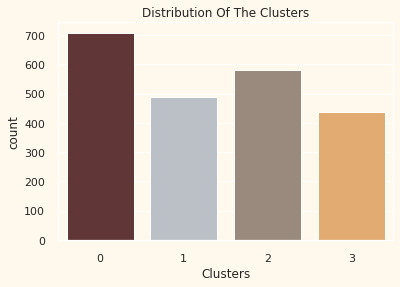

In [45]:
#Plotting countplot dari clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Cluster tampaknya cukup terdistribusi.

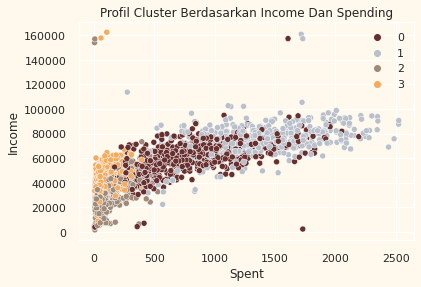

In [46]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

**Income vs spending plot menunjukkan pola cluster**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Selanjutnya, kita akan melihat distribusi klaster yang terperinci sesuai dengan berbagai produk dalam data. Yaitu: Wines, Fruits, Meat, Fish, Sweets dan Gold

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


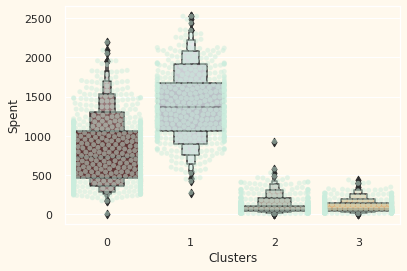

In [47]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

Dari plot di atas, dapat dilihat dengan jelas bahwa cluster 1 adalah kumpulan pelanggan terbesar kita diikuti oleh cluster 0. Kita dapat mengeksplorasi apa yang dibelanjakan setiap cluster untuk strategi pemasaran yang ditargetkan.

Selanjutnya mari kita jelajahi bagaimana kinerja kampanye kita di masa lalu.

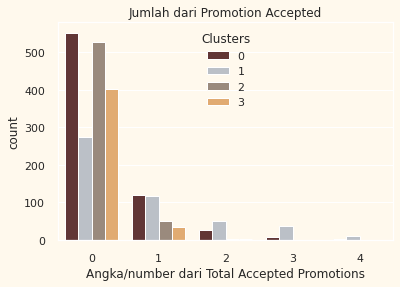

In [50]:
# Membuat fitur untuk mendapatkan sejumlah promosi yang diterima/accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# plotting Jumlah dari total kampanye yang diterima.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Jumlah dari Promotion Accepted")
pl.set_xlabel("Angka/number dari Total Accepted Promotions")
plt.show()

Sejauh ini belum ada tanggapan yang luar biasa terhadap kampanye tersebut. Sangat sedikit peserta secara keseluruhan. Selain itu, tidak ada satu bagian yang mengambil semua 5 dari mereka. Mungkin diperlukan kampanye yang lebih tepat sasaran dan terencana dengan baik untuk meningkatkan penjualan.

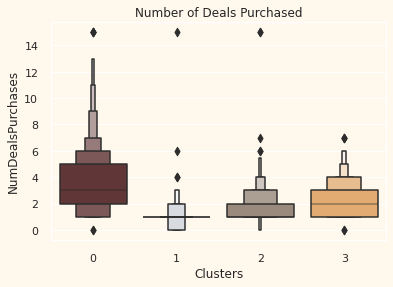

In [53]:
#Plotting jumlah transaksi yang dibeli / deals purchased 
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Tidak seperti kampanye, penawaran yang ditawarkan berhasil dengan baik. Ini memiliki hasil terbaik dengan cluster 0 dan cluster 3. Namun, pelanggan bintang kita cluster 1 tidak terlalu tertarik dengan kesepakatan. Sepertinya tidak ada yang menarik cluster 2 secara berlebihan

<Figure size 432x288 with 0 Axes>

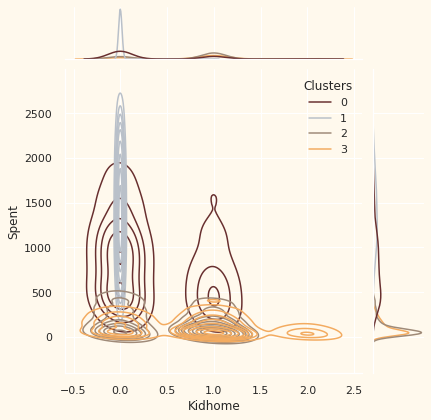

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

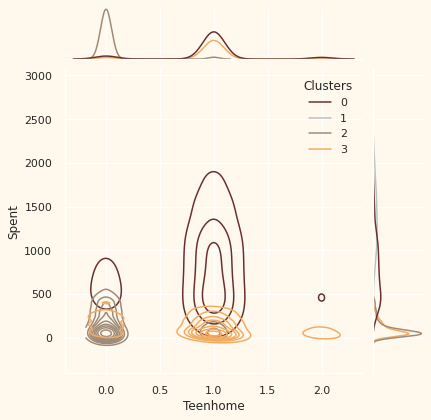

<Figure size 432x288 with 0 Axes>

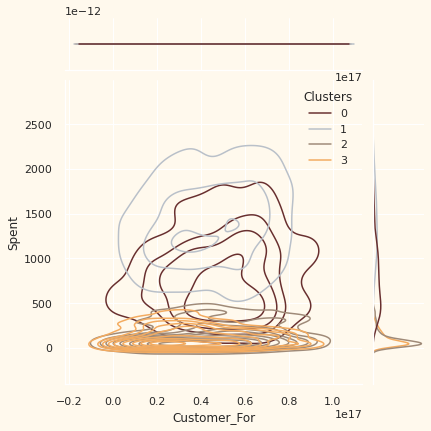

<Figure size 432x288 with 0 Axes>

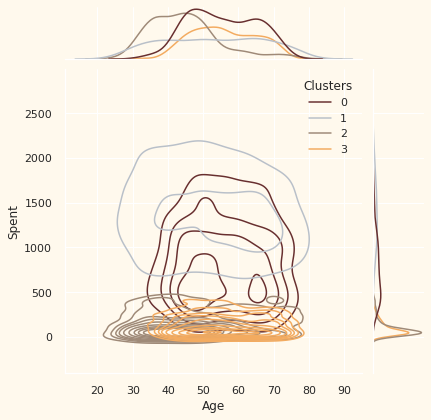

<Figure size 432x288 with 0 Axes>

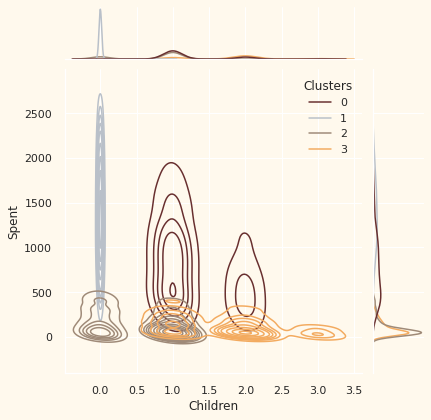

<Figure size 432x288 with 0 Axes>

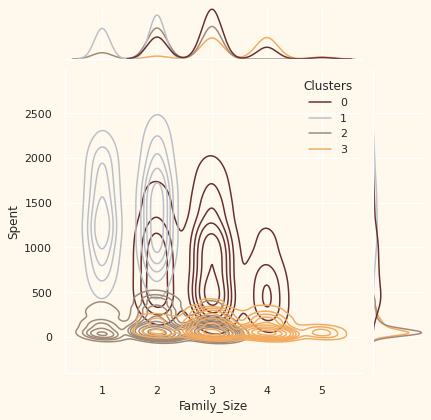

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

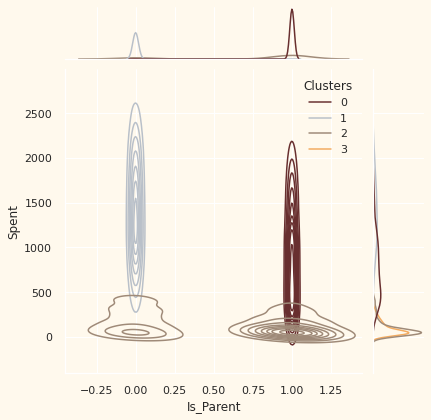

<Figure size 432x288 with 0 Axes>

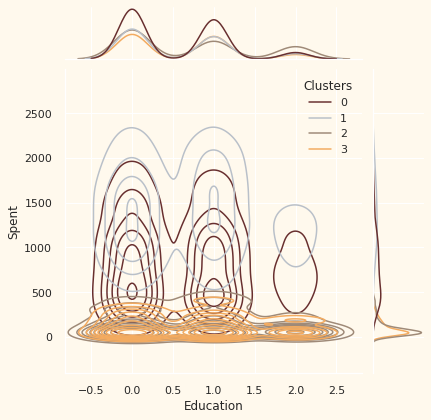

<Figure size 432x288 with 0 Axes>

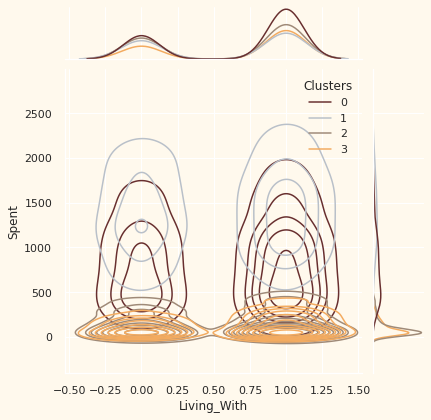

In [55]:
# untuk detail lebih lanjut tentang gaya pembelian/purchasing style 
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Sekarang kita telah membentuk klaster dan melihat kebiasaan pembelian mereka. Mari kita lihat siapa saja yang ada di cluster ini. Untuk itu, kita akan membuat profil klaster-klaster yang terbentuk dan sampai pada kesimpulan tentang siapa pelanggan utama kita dan siapa yang membutuhkan perhatian lebih dari tim pemasaran toko ritel.

Untuk memutuskan bahwa kita akan merencanakan beberapa fitur yang menunjukkan ciri-ciri pribadi pelanggan dalam terang cluster mereka masuk Atas dasar hasil, kita akan sampai pada kesimpulan.

# Latihan (10)

<Figure size 432x288 with 0 Axes>

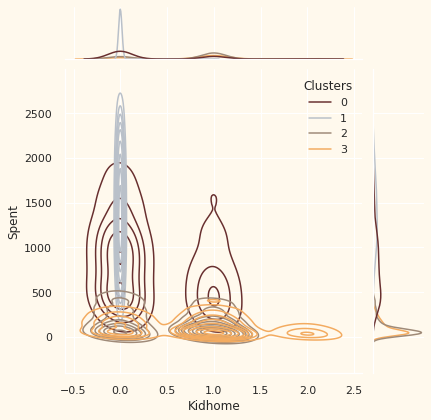

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

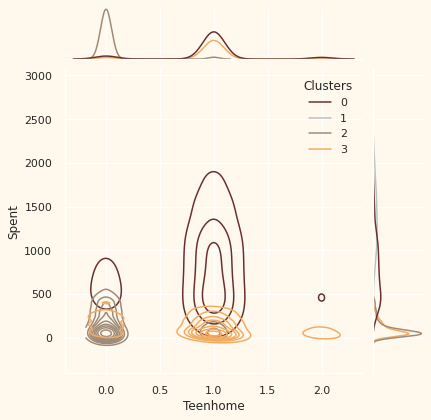

<Figure size 432x288 with 0 Axes>

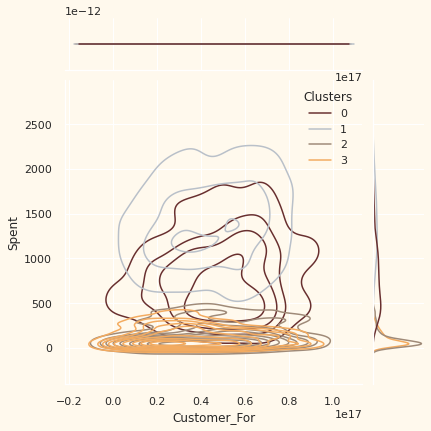

<Figure size 432x288 with 0 Axes>

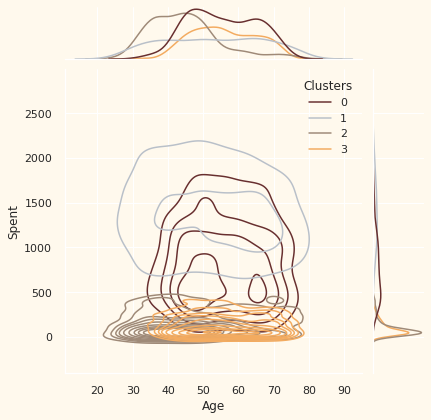

<Figure size 432x288 with 0 Axes>

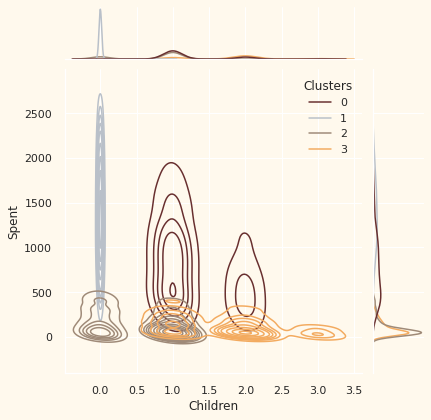

<Figure size 432x288 with 0 Axes>

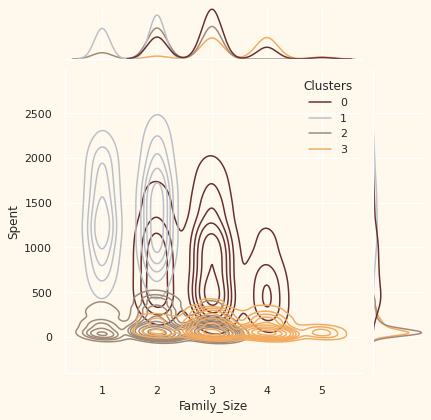

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

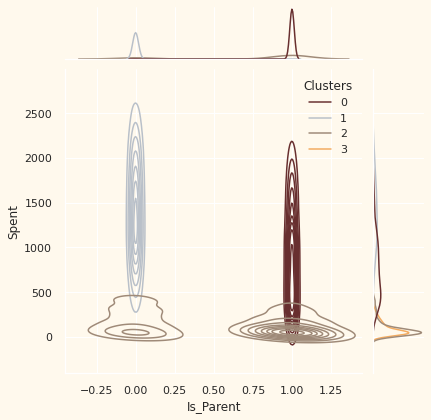

<Figure size 432x288 with 0 Axes>

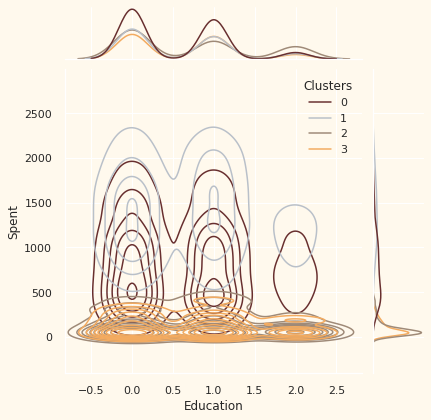

<Figure size 432x288 with 0 Axes>

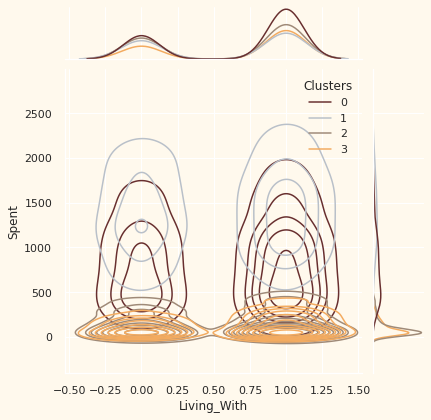

<Figure size 432x288 with 0 Axes>

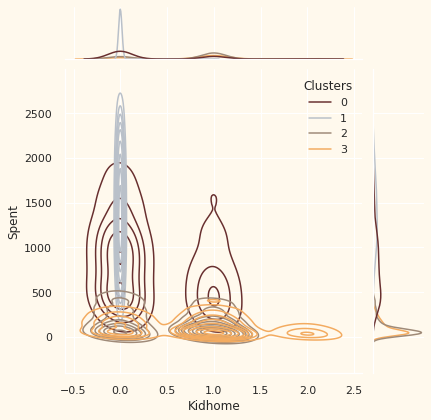

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

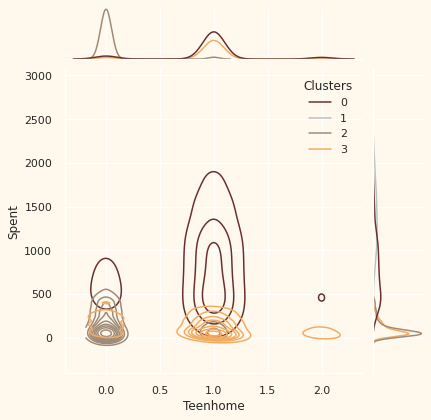

<Figure size 432x288 with 0 Axes>

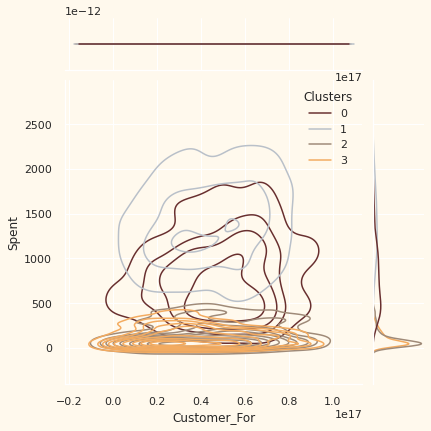

<Figure size 432x288 with 0 Axes>

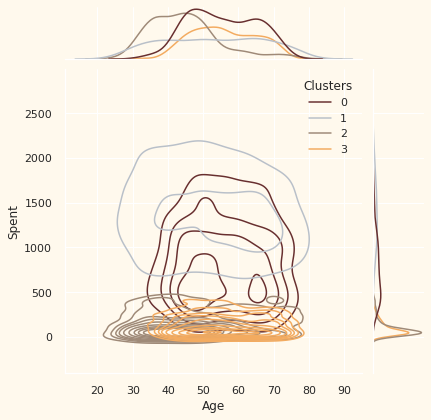

<Figure size 432x288 with 0 Axes>

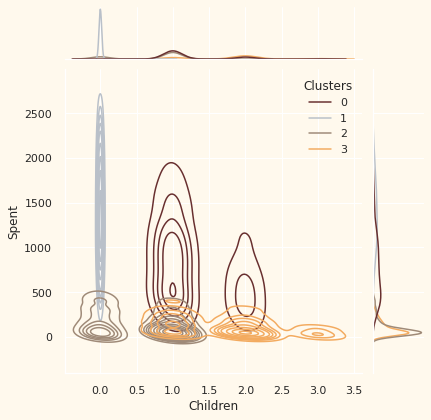

<Figure size 432x288 with 0 Axes>

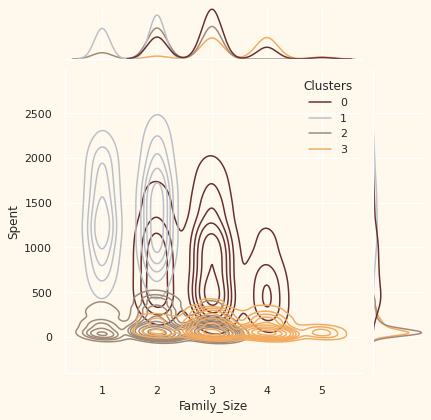

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

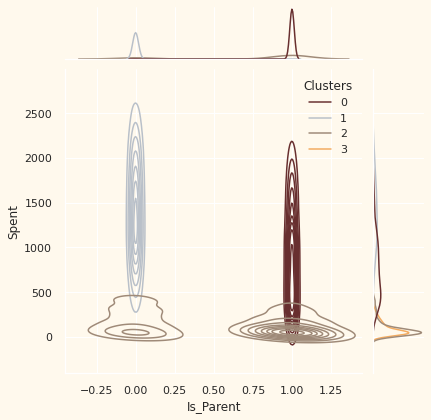

<Figure size 432x288 with 0 Axes>

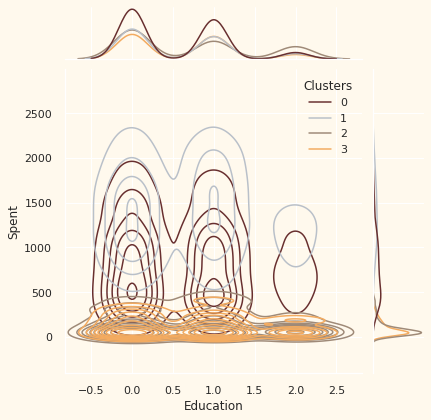

<Figure size 432x288 with 0 Axes>

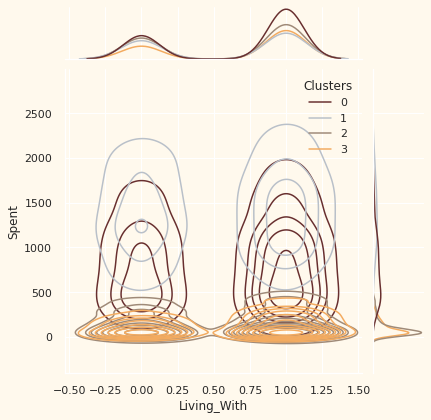

In [56]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

#Berikan Penjelasan dari coding ini!
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

**Hal-hal yang perlu diperhatikan:**

Informasi berikut dapat disimpulkan tentang pelanggan di cluster yang berbeda.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

Dalam kasus ini, kita melakukan unsupervised clustering.
Kita memang menggunakan pengurangan dimensi/dimensionality reduction diikuti oleh agglomerative clustering.
Kita datang dengan 4 cluster dan selanjutnya menggunakannya dalam membuat profil pelanggan dalam cluster sesuai dengan struktur keluarga dan pendapatan/pengeluaran mereka(income/spending).

Ini dapat digunakan dalam merencanakan strategi pemasaran yang lebih baik!


**<span style="color:#682F2F;"> Terimakasih Semoga dapat menambah akan pemahaman kalian!</span>**

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>